##Statistical Analysis

Please upload your dataset CSV file:


Saving labels_fixed.csv to labels_fixed.csv
DATASET OVERVIEW

Total number of images: 5035

Columns in dataset: ['img_name', 'class', 'label']

First few rows:
                                            img_name    class  \
0  Set1_012-Al-Baqara-2-156-Thuluth_segment_no_0.jpg  Thuluth   
1    Set1_013-3-Al-Imran-37-Thuluth_segment_no_0.jpg  Thuluth   
2    Set1_013-3-Al-Imran-37-Thuluth_segment_no_1.jpg  Thuluth   
3  Set1_02-Al-Fath-48-1to4-ThuluthNaskh-2_segment...  Thuluth   
4  Set1_02-Al-Fath-48-1to4-ThuluthNaskh-2_segment...  Thuluth   

                                               label  
0                           انا لله وانا اليه راجعون  
1        كلما دخل عليها زكريا المحراب وجد عندها رزقا  
2  قال يا مريم أن لك هذا قالت هو من عند الله إن ا...  
3  بسم الله الرحمن الرحيم إنا فتحنا لك فتحا مبينا...  
4                             بسم الله الرحمن الرحيم  

CALLIGRAPHY STYLES DISTRIBUTION

Samples per style:
class
Diwani       243
Kufic         27
Muhaquaq      17
Naskh    

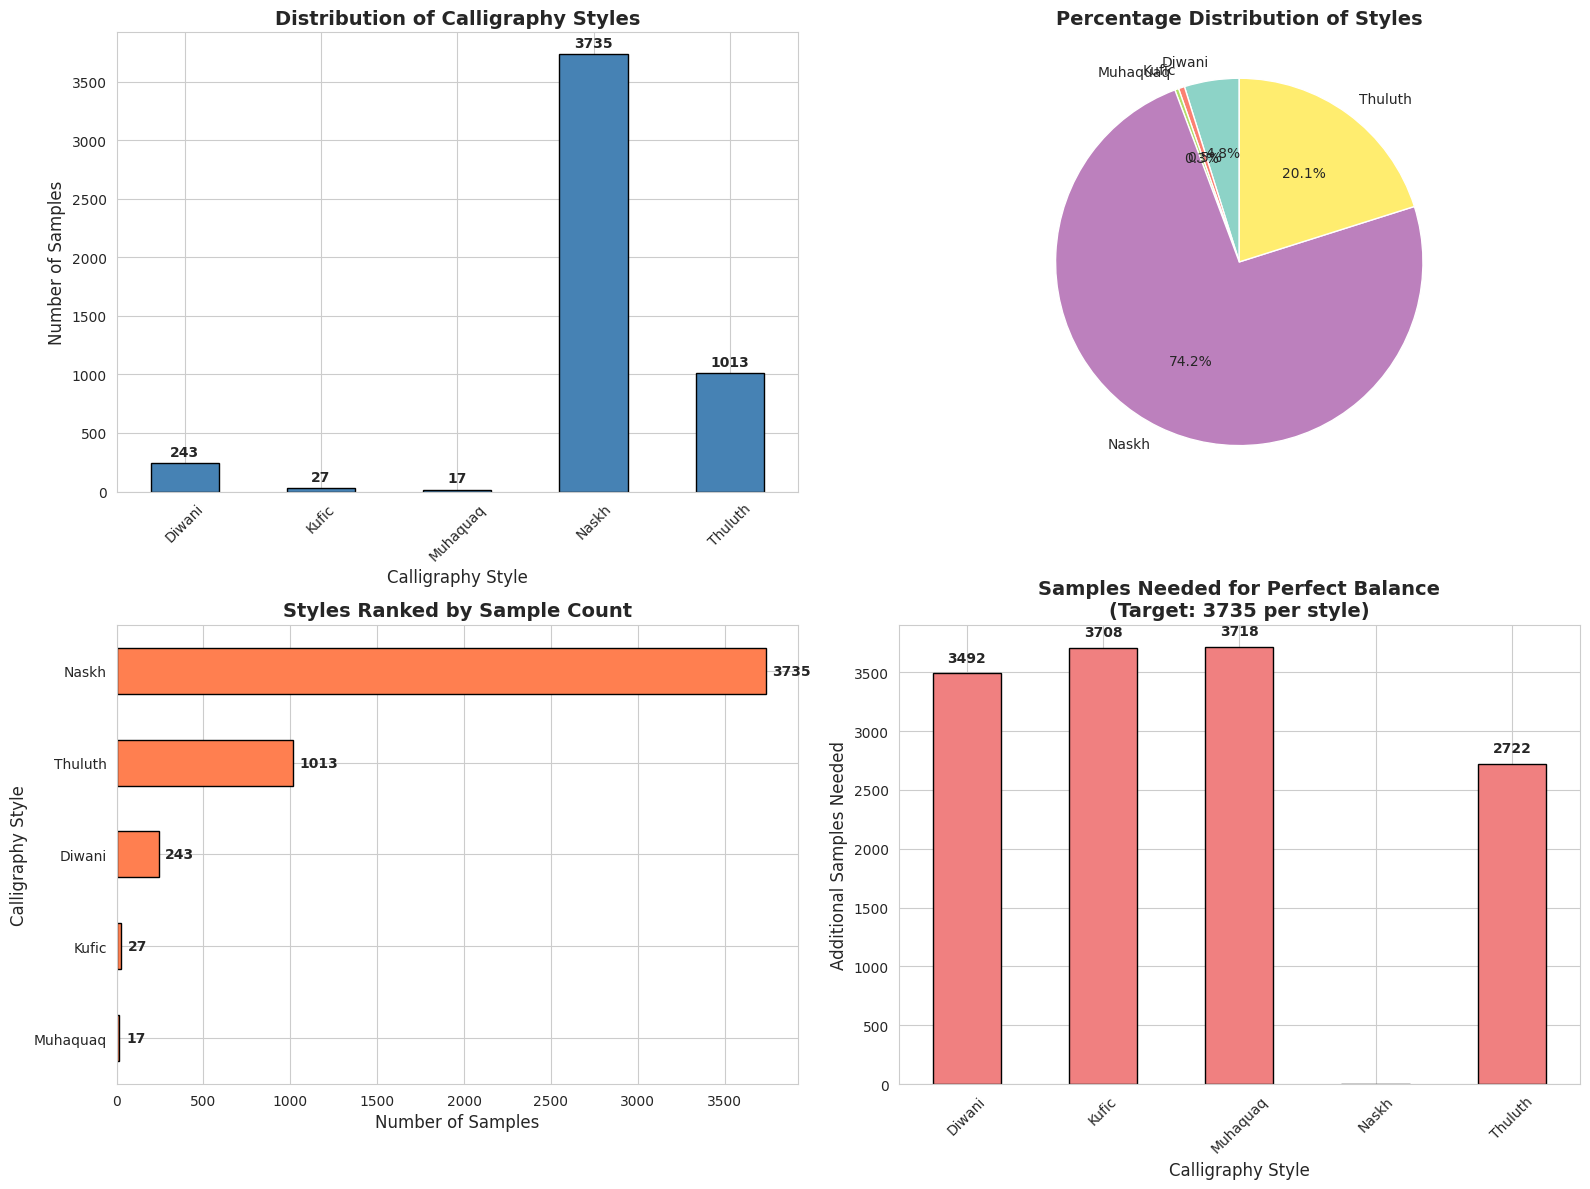


AUGMENTATION RECOMMENDATIONS

📊 OPTION 1: Balance to Maximum Class
Target: 3735 samples per style

Samples to generate per style:
  • Diwani: generate 3492 images (current: 243)
  • Kufic: generate 3708 images (current: 27)
  • Muhaquaq: generate 3718 images (current: 17)
  • Naskh: already at target (3735 images)
  • Thuluth: generate 2722 images (current: 1013)

Total new images to generate: 13640
Final dataset size: 18675

📊 OPTION 2: Balance to Minimum Class (Conservative)
Target: 17 samples per style
This would require downsampling majority classes or just using minimum.
Final dataset size: 85

📊 OPTION 3: Balance to Mean
Target: 1007 samples per style

Samples to generate per style:
  • Diwani: generate 764 images (current: 243)
  • Kufic: generate 980 images (current: 27)
  • Muhaquaq: generate 990 images (current: 17)
  • Naskh: sufficient or reduce to 1007 (current: 3735)
  • Thuluth: sufficient or reduce to 1007 (current: 1013)

Total new images to generate: 2734


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Upload your CSV file
from google.colab import files
print("Please upload your dataset CSV file:")
uploaded = files.upload()

# Read the CSV file
csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename)

print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nTotal number of images: {len(df)}")
print(f"\nColumns in dataset: {list(df.columns)}")
print(f"\nFirst few rows:")
print(df.head())

# Statistical Analysis
print("\n" + "="*60)
print("CALLIGRAPHY STYLES DISTRIBUTION")
print("="*60)

# Count samples per class
class_counts = df['class'].value_counts().sort_index()
print("\nSamples per style:")
print(class_counts)

# Calculate statistics
print("\n" + "-"*60)
print("DISTRIBUTION STATISTICS")
print("-"*60)
print(f"Total styles: {len(class_counts)}")
print(f"Min samples in a style: {class_counts.min()} ({class_counts.idxmin()})")
print(f"Max samples in a style: {class_counts.max()} ({class_counts.idxmax()})")
print(f"Mean samples per style: {class_counts.mean():.2f}")
print(f"Median samples per style: {class_counts.median():.2f}")
print(f"Std deviation: {class_counts.std():.2f}")

# Calculate imbalance ratio
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\nImbalance ratio (max/min): {imbalance_ratio:.2f}x")

# Percentage distribution
print("\n" + "-"*60)
print("PERCENTAGE DISTRIBUTION")
print("-"*60)
class_percentages = (class_counts / len(df) * 100).round(2)
for style, percentage in class_percentages.items():
    print(f"{style}: {percentage}% ({class_counts[style]} images)")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Bar plot with counts
ax1 = axes[0, 0]
class_counts.plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('Distribution of Calligraphy Styles', fontsize=14, fontweight='bold')
ax1.set_xlabel('Calligraphy Style', fontsize=12)
ax1.set_ylabel('Number of Samples', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
# Add value labels on bars
for i, v in enumerate(class_counts):
    ax1.text(i, v + max(class_counts)*0.01, str(v), ha='center', va='bottom', fontweight='bold')

# 2. Pie chart
ax2 = axes[0, 1]
colors = plt.cm.Set3(np.linspace(0, 1, len(class_counts)))
ax2.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize': 10})
ax2.set_title('Percentage Distribution of Styles', fontsize=14, fontweight='bold')

# 3. Horizontal bar plot sorted by count
ax3 = axes[1, 0]
class_counts_sorted = class_counts.sort_values()
class_counts_sorted.plot(kind='barh', ax=ax3, color='coral', edgecolor='black')
ax3.set_title('Styles Ranked by Sample Count', fontsize=14, fontweight='bold')
ax3.set_xlabel('Number of Samples', fontsize=12)
ax3.set_ylabel('Calligraphy Style', fontsize=12)
# Add value labels
for i, v in enumerate(class_counts_sorted):
    ax3.text(v + max(class_counts)*0.01, i, str(v), ha='left', va='center', fontweight='bold')

# 4. Gap analysis - how many samples needed to balance
ax4 = axes[1, 1]
target_count = class_counts.max()  # Balance to the maximum
samples_needed = target_count - class_counts
samples_needed.plot(kind='bar', ax=ax4, color='lightcoral', edgecolor='black')
ax4.set_title(f'Samples Needed for Perfect Balance\n(Target: {target_count} per style)',
              fontsize=14, fontweight='bold')
ax4.set_xlabel('Calligraphy Style', fontsize=12)
ax4.set_ylabel('Additional Samples Needed', fontsize=12)
ax4.tick_params(axis='x', rotation=45)
ax4.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
# Add value labels
for i, v in enumerate(samples_needed):
    if v > 0:
        ax4.text(i, v + max(samples_needed)*0.02, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Augmentation recommendations
print("\n" + "="*60)
print("AUGMENTATION RECOMMENDATIONS")
print("="*60)

print("\n📊 OPTION 1: Balance to Maximum Class")
print(f"Target: {target_count} samples per style")
print("\nSamples to generate per style:")
for style in class_counts.index:
    needed = target_count - class_counts[style]
    if needed > 0:
        print(f"  • {style}: generate {needed} images (current: {class_counts[style]})")
    else:
        print(f"  • {style}: already at target ({class_counts[style]} images)")
print(f"\nTotal new images to generate: {samples_needed.sum()}")
print(f"Final dataset size: {len(df) + samples_needed.sum()}")

print("\n📊 OPTION 2: Balance to Minimum Class (Conservative)")
min_count = class_counts.min()
print(f"Target: {min_count} samples per style")
print("This would require downsampling majority classes or just using minimum.")
print(f"Final dataset size: {min_count * len(class_counts)}")

print("\n📊 OPTION 3: Balance to Mean")
mean_count = int(class_counts.mean())
print(f"Target: {mean_count} samples per style")
samples_needed_mean = mean_count - class_counts
samples_needed_mean = samples_needed_mean.clip(lower=0)
print("\nSamples to generate per style:")
for style in class_counts.index:
    needed = max(0, mean_count - class_counts[style])
    if needed > 0:
        print(f"  • {style}: generate {needed} images (current: {class_counts[style]})")
    else:
        print(f"  • {style}: sufficient or reduce to {mean_count} (current: {class_counts[style]})")
print(f"\nTotal new images to generate: {samples_needed_mean.sum()}")


##Data Generation

In [ ]:
!pip install arabic_reshaper
!pip install python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 9.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import random
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import arabic_reshaper
from bidi.algorithm import get_display
import re
import kagglehub
from kagglehub import KaggleDatasetAdapter

# -------------------------------
# CONFIG
# -------------------------------
font_dir = "drive/MyDrive/fonts"  # Ensure you upload fonts to this directory
output_dir = "drive/MyDrive/output/generated_data_mean"  # New folder for generated data
csv_path = "drive/MyDrive/output/labels.csv"
image_size = (5000, 600)

# Create the output folder
os.makedirs(output_dir, exist_ok=True)

# -------------------------------
# FUNCTION DEFINITIONS
# -------------------------------

# Function to remove harakat (diacritics) from Arabic text
def remove_harakat(text):
    harakat_pattern = r'[\u0610-\u061A\u064B-\u0652\u0670]'  # Common harakat Unicode ranges
    return re.sub(harakat_pattern, '', text)

def remove_ponctuation(text):
      # Changed harakat_pattern to punctuation_pattern and made it a regex string
      punctuation_pattern = r'[.؟":/،!]'  # Regex pattern to match period or comma
      return re.sub(punctuation_pattern, '', text)

# Function to check harakat support
def are_harakat_supported(text, font_path, font_size=150):
    harakat_pattern = r'[\u0610-\u061A\u064B-\u0652\u0670]'  # Common harakat Unicode ranges
    harakat_chars = re.findall(harakat_pattern, text)  # Find all harakat characters

    if not harakat_chars:
        return True  # No harakat in the text, so it's already supported

    # Check if harakat characters are supported by the font
    for char in harakat_chars:
        compatible, _ = is_text_compatible_with_font(char, font_path, font_size)
        if not compatible:
            return False  # Return False if any harakat is unsupported

    return True

# Function to check text compatibility with the font
def is_text_compatible_with_font(text, font_path, font_size=150):
    """
    Checks if all characters in the given text can be rendered by the font.
    Returns (True, None) if fully compatible, or (False, missing_characters) otherwise.
    """
    try:
        font = ImageFont.truetype(font_path, font_size)
        missing_chars = []
        for char in text:
            # skip spaces and punctuation
            if char.strip() == "":
                continue
            # If font.getmask(char) fails, the char is unsupported
            try:
                mask = font.getmask(char)
                if mask.size[0] == 0 or mask.size[1] == 0:
                    missing_chars.append(char)
            except Exception:
                missing_chars.append(char)
        if missing_chars:
            return False, missing_chars
        return True, None
    except Exception as e:
        return False, [f"Font load error: {e}"]

# -------------------------------
# FONT STYLES AND FILE LOADING
# -------------------------------

# Define the fonts per style based on the image you uploaded
style_to_fonts = {
    "Diwani": ["Diwani_1", "Diwani_2", "Diwani_3", "Diwani_4", "Diwani_5", "Diwani_6"],
    "Kufic": ["Kufic_1", "Kufic_2", "Kufic_3", "Kufic_4", "Kufic_5", "Kufic_6"],
    "Thuluth": ["Thuluth_1", "Thuluth_2", "Thuluth_3", "Thuluth_4", "Thuluth_5", "Thuluth_6"]
}

# Load the dataset from Kaggle
try:
    # Use kagglehub.dataset_download to ensure the dataset is available.
    # In Colab, attached Kaggle datasets are often mounted directly under /kaggle/input.
    # The return value of dataset_download might point to a cache, but the accessible path is /kaggle/input.
    kagglehub.dataset_download(
        "tahaalselwii/the-arabic-english-sentence-bank-25k"
    )

    # Construct the path to the CSV file based on where Kaggle datasets are typically mounted in Colab
    kaggle_input_dir = "/kaggle/input/the-arabic-english-sentence-bank-25k"
    csv_file_in_dataset = os.path.join(kaggle_input_dir, "arabic_english_sentences.csv")

    # Check if the file exists at the expected location
    if not os.path.exists(csv_file_in_dataset):
        raise FileNotFoundError(f"Dataset CSV not found at {csv_file_in_dataset}. Please ensure the Kaggle dataset is properly linked or downloaded.")

    # Load the dataset using pandas
    dataset_df = pd.read_csv(csv_file_in_dataset)

    # Extract text from the specified columns and combine them into a list
    all_texts = []

    # Corrected: Check for 'Arabic' column name (capitalized)
    if 'Arabic' in dataset_df.columns:
        for idx, text in dataset_df['Arabic'].dropna().astype(str).items():
            all_texts.append({"text": text, "sample_id": idx})


    # Shuffle the list of texts
    random.shuffle(all_texts)
    print("Loaded texts from Kaggle dataset.")
    print(f"Total available texts: {len(all_texts)}")

except Exception as e:
    print(f"Error loading dataset or processing texts: {e}")
    all_texts = []  # Fallback to empty list if dataset loading fails

Using Colab cache for faster access to the 'the-arabic-english-sentence-bank-25k' dataset.
Loaded texts from Kaggle dataset.
Total available texts: 25000


###Generate till the Max

In [ ]:
# -------------------------------
# AUGMENTATION LOGIC
# -------------------------------
# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)
# Assuming `class_counts` and `mean_count` are already available
styles_to_generate = {}

for style, count in class_counts.items():
    # Calculate how many samples are missing for this style to reach the mean count
    samples_needed = max(0, target_count - count)
    styles_to_generate[style] = samples_needed

# NOTE: The line below was a hardcoded example and might prevent proper generation
# Using the dynamically calculated styles_to_generate from the loop above

print(f"Styles to Generate: {styles_to_generate}")

# -------------------------------
# GENERATE IMAGES
# -------------------------------
data_records = []
used_texts = set()  # Keep track of used texts

# Loop through the fonts and generate images
for style, fonts_for_style in style_to_fonts.items():
    for font_name in fonts_for_style:
        # Check for both .ttf and .otf extensions
        font_path_ttf = os.path.join(font_dir, f"{font_name}.ttf")
        font_path_otf = os.path.join(font_dir, f"{font_name}.otf")
        font_path = None
        if os.path.exists(font_path_ttf):
            font_path = font_path_ttf
        elif os.path.exists(font_path_otf):
            font_path = font_path_otf
        else:
            print(f"⚠️ Font file not found for {font_name} in {font_dir}")
            continue  # Skip to the next font if file not found

        print(f"Generating for {font_name}")
        num_images_for_style = styles_to_generate.get(style, 0)
        if num_images_for_style > 0:
            num_images_per_font = num_images_for_style // len(fonts_for_style)
            print(f"Generating {num_images_per_font} images for style '{style}' with font '{font_name}'")

            # Select texts of the current style from the dataset
            available_texts = [t for t in all_texts if t["text"] not in used_texts]

            for _ in range(num_images_per_font):
                if not available_texts:
                    print(f"⚠️ Ran out of unique texts for style '{style}'!")
                    break

                current_sample = None
                current_text = None
                sample_id = None
                compatible = False
                attempts = 0
                max_attempts = 100 # Limit attempts to avoid infinite loops

                while not compatible and available_texts and attempts < max_attempts:
                    current_sample = random.choice(available_texts)
                    current_text = current_sample["text"]
                    sample_id = current_sample["sample_id"]

                    text_to_check = current_text # Start with the original text

                    # Handle harakat removal if the font doesn't support it
                    if font_name in ['Kufic_1', 'Kufic_4']:
                        text_to_check = remove_harakat(text_to_check)

                    # Handle punctuation removal if required for specific fonts
                    if font_name in ['Kufic_1', 'Diwani_4','Kufic_2','Kufic_4']:
                        text_to_check = remove_ponctuation(text_to_check)

                    # Check if text is compatible with the font
                    compatible, missing_chars = is_text_compatible_with_font(text_to_check, font_path)
                    if not compatible:
                        # print(f"🚫 Font '{font_name}' missing characters {missing_chars} for text: {current_text[:50]}... Trying another text.")
                        available_texts.remove(current_sample) # Remove the incompatible text
                        attempts += 1
                    else:
                        # Add the used text to the set and proceed
                        used_texts.add(current_text)


                if not compatible or len(current_text) > 256 or len(current_text) < 2:
                     if attempts == max_attempts:
                         print(f"⚠️ Reached max attempts to find compatible text for style '{style}' with font '{font_name}'.")
                     continue # Skip this iteration if no compatible text found or text length is not suitable


                # Generate the image
                try:
                    # Load the font with RAQM support
                    font = ImageFont.truetype(font_path, 150, layout_engine=ImageFont.Layout.RAQM)

                    # Create an image for the text
                    img = Image.new("RGB", image_size, (255, 255, 255))
                    draw = ImageDraw.Draw(img)

                    # Calculate text size and position for centering
                    bbox = draw.textbbox((0, 0), text_to_check, font=font, anchor="mm") # Use text_to_check for drawing
                    x = image_size[0] // 2
                    y = image_size[1] // 2

                    # Draw the Arabic text (RAQM handles reshaping)
                    draw.text((x, y), text_to_check, fill="black", font=font, anchor="mm")

                    # Determine the file path for saving
                    filename = f"{font_name}_sample{sample_id:04d}.png"
                    filepath = os.path.join(output_dir, filename)

                    # Save the image and handle errors
                    try:
                        img.save(filepath)
                    except Exception as e:
                        print(f"Error saving image {filename}: {e}")

                    data_records.append({
                        "img_name": filename,
                        "label": current_text,
                        "font": font_name
                    })
                except Exception as e:
                    print(f"❌ Error with RAQM for font {font_name} and text '{current_text[:50]}...': {e}")

# Save labels to CSV
try:
    df = pd.DataFrame(data_records)
    df.to_csv(csv_path, index=False, encoding="utf-8-sig")
    print(f"💾 Labels saved to {csv_path}")
except PermissionError:
    print(f"⚠️ Permission error! Close the file if it’s open and rerun.")
except Exception as e:
    print(f"❌ Error saving labels to CSV: {e}")

Styles to Generate: {'Diwani': 3492, 'Kufic': 3708, 'Muhaquaq': 3718, 'Naskh': 0, 'Thuluth': 2722}
Generating for Diwani_1
Generating 582 images for style 'Diwani' with font 'Diwani_1'
Generating for Diwani_2
Generating 582 images for style 'Diwani' with font 'Diwani_2'
Generating for Diwani_3
Generating 582 images for style 'Diwani' with font 'Diwani_3'
Generating for Diwani_4
Generating 582 images for style 'Diwani' with font 'Diwani_4'
Generating for Diwani_5
Generating 582 images for style 'Diwani' with font 'Diwani_5'
Generating for Diwani_6
Generating 582 images for style 'Diwani' with font 'Diwani_6'
Generating for Kufic_1
Generating 618 images for style 'Kufic' with font 'Kufic_1'
Generating for Kufic_2
Generating 618 images for style 'Kufic' with font 'Kufic_2'
Generating for Kufic_3
Generating 618 images for style 'Kufic' with font 'Kufic_3'
Generating for Kufic_4
Generating 618 images for style 'Kufic' with font 'Kufic_4'
Generating for Kufic_5
Generating 618 images for styl